# Upgrading Plotly to the latest version

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 20.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Loading Data

In [ ]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 

# Preliminary Data Exploration

In [ ]:
print(f"Given dataset has a shape of {data.shape}.")
print(f"It means that the dataset has {len(data)} rows and {len(data.columns)} columns.")
print(f"The names of the columns are: {', '.join(list(data.columns))}.")

Given dataset has a shape of (506, 14).
It means that the dataset has 506 rows and 14 columns.
The names of the columns are: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, PRICE.


In [ ]:
print(f"Brief description of the given dataset:\n{data.describe()}")

Brief description of the given dataset:
        CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   
mean    3.61  11.36  11.14   0.07   0.55   6.28  68.57   3.80   9.55 408.24   
std     8.60  23.32   6.86   0.25   0.12   0.70  28.15   2.11   8.71 168.54   
min     0.01   0.00   0.46   0.00   0.39   3.56   2.90   1.13   1.00 187.00   
25%     0.08   0.00   5.19   0.00   0.45   5.89  45.02   2.10   4.00 279.00   
50%     0.26   0.00   9.69   0.00   0.54   6.21  77.50   3.21   5.00 330.00   
75%     3.68  12.50  18.10   0.00   0.62   6.62  94.07   5.19  24.00 666.00   
max    88.98 100.00  27.74   1.00   0.87   8.78 100.00  12.13  24.00 711.00   

       PTRATIO      B  LSTAT  PRICE  
count   506.00 506.00 506.00 506.00  
mean     18.46 356.67  12.65  22.53  
std       2.16  91.29   7.14   9.20  
min      12.60   0.32   1.73   5.00  
25%      17.40 375.38   6.95  17.02  
50%      19.05 391.4

##Data Clearing and Formatting

The first step when working with data is to clear and format it. This will ensure convenient operation without errors.

In [ ]:
print(f"Does the data contain any NaN values?\n {'Yes' if data.isna().values.any() else 'No'}")
print(f"Does the data contain any duplicated values?\n {'Yes' if data.duplicated().values.any() else 'No'}")

Does the data contain any NaN values?
 No
Does the data contain any duplicated values?
 No


Luckily, the dataset comes without NaN values and duplicates, now we should check if any formatting is needed.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


From the output above it is visible that all columns are in float format, which is complitly suitable for the given task, so we can move to computations without any changes.

##Visualizing the Given Data

###House Prices

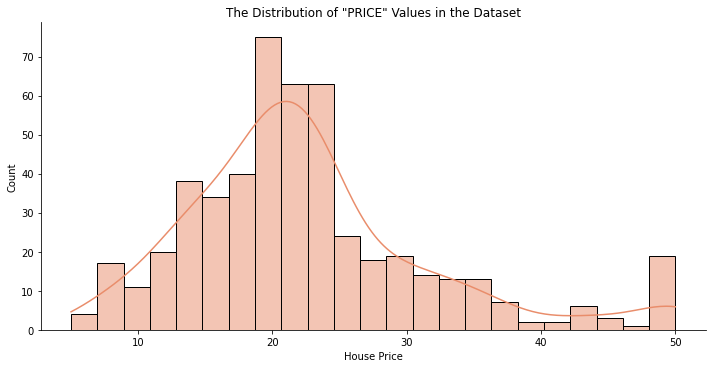

In [ ]:
ax = sns.set_palette("flare")
ax = sns.displot(data.PRICE, kde=True, aspect=2)
ax.set(xlabel='House Price', 
       title='The Distribution of "PRICE" Values in the Dataset')

###Number of Rooms

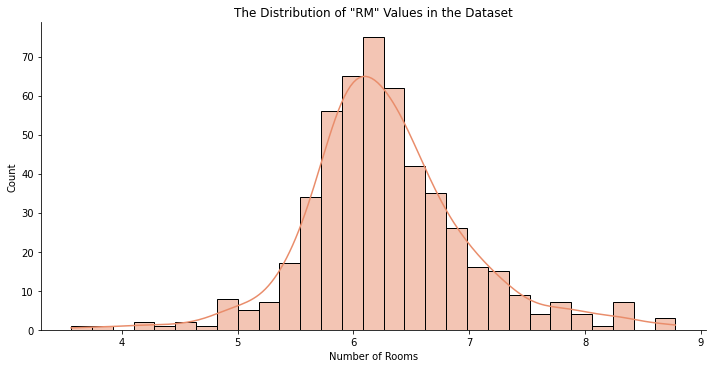

In [ ]:
ax = sns.set_palette("flare")
ax = sns.displot(data.RM, kde=True, aspect=2)
ax.set(xlabel='Number of Rooms', 
       title='The Distribution of "RM" Values in the Dataset')

###Distance to Employment – Length of Commute

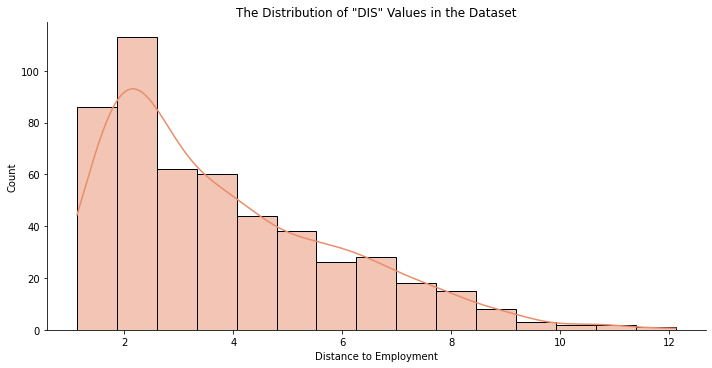

In [ ]:
ax = sns.set_palette("flare")
ax = sns.displot(data.DIS, kde=True, aspect=2)
ax.set(xlabel='Distance to Employment', 
       title='The Distribution of "DIS" Values in the Dataset')

###Access to Highways

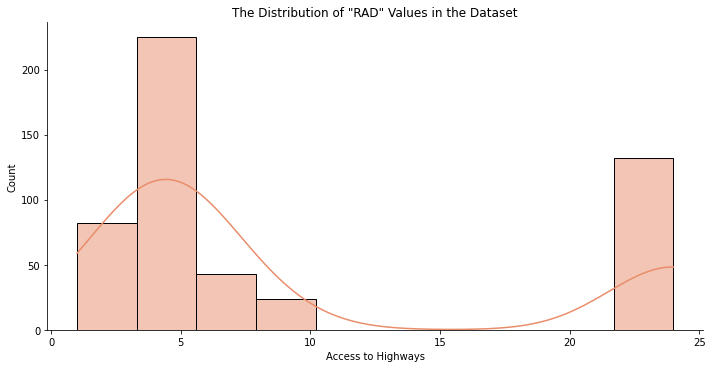

In [ ]:
ax = sns.set_palette("flare")
ax = sns.displot(data.RAD, kde=True, aspect=2)
ax.set(xlabel='Access to Highways', 
       title='The Distribution of "RAD" Values in the Dataset')

###Is the House by the River?

For better understanding, the values of "CHAS" column will be changed to "Yes" and "No" instead of "1" and "0" respectively. 

In [ ]:
grouped_CHAS = data.groupby('CHAS', as_index=False).agg({'CRIM':pd.Series.count})

In [ ]:
fig = px.bar(grouped_CHAS,
       x=['No', 'Yes'],
       y='CRIM',
       title='Next to Charles River?',
       color='CHAS',
       hover_name='CRIM')
fig.update_layout(xaxis_title='Property Located Next to the River?',
                  yaxis_title='Number of Homes')
fig.update(layout_coloraxis_showscale=False)

# Understand the Relationships in the Data

There might be some relationships in the data that we should know about and we will visualize them for better understanding.

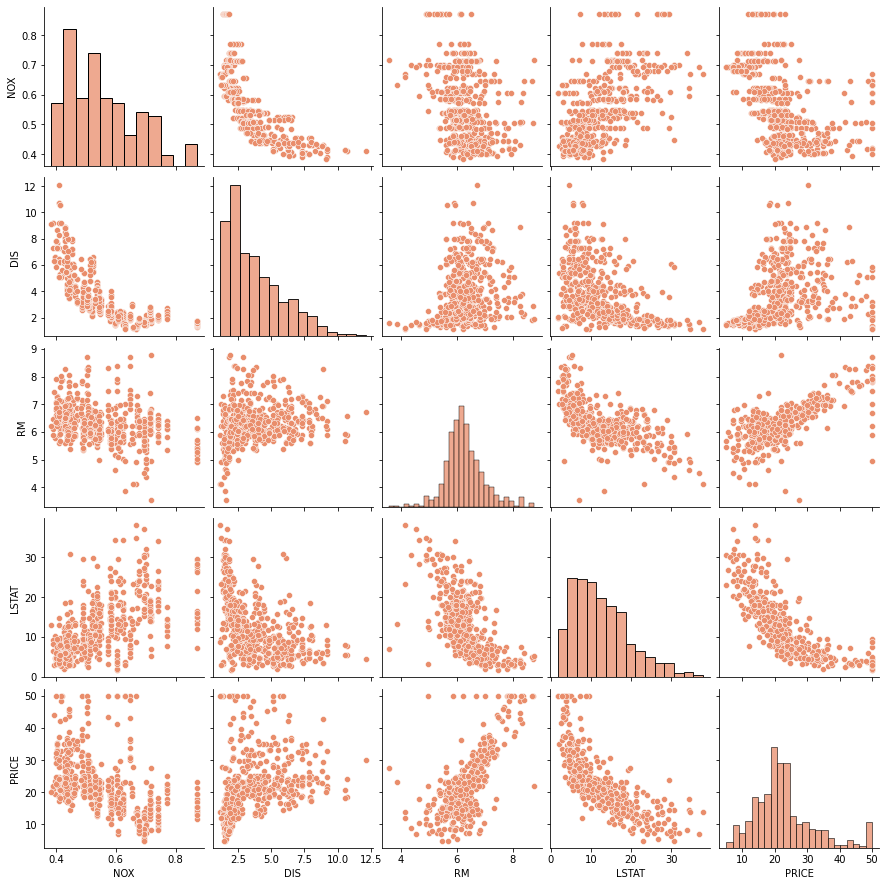

In [ ]:
sns.pairplot(data,
             vars=['NOX', 'DIS', 'RM', 'LSTAT', 'PRICE'])

Now all the interesting data is visualized, but let's take a look at some of the relationships in more detail.
For this task I will use jointplot. as it will show the relationship from different perspectives.

###Distance from Employment VS Pollution

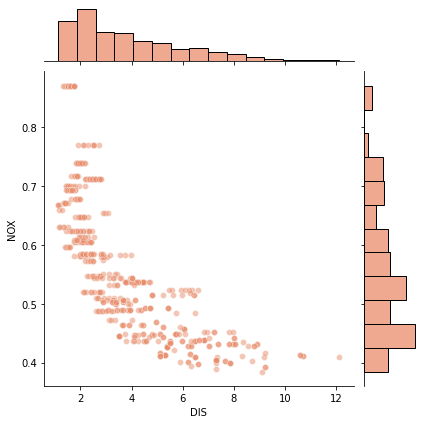

In [ ]:
sns.jointplot(data=data, x='DIS', y='NOX', joint_kws={'alpha':0.5})

From the plot above it is visible, that the relationship between NOX and DIS is inversely proportional, which means the less the distance from employment is, the more pollution is.

###Proportion of Non-Retail Industry VS Pollution

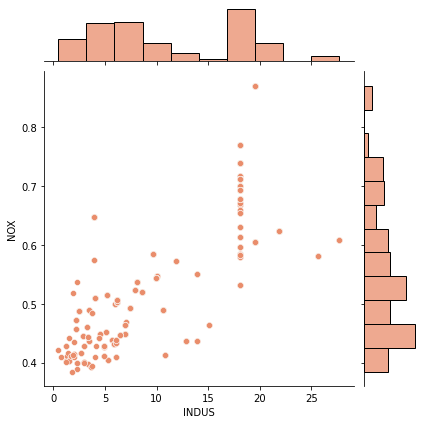

In [ ]:
sns.jointplot(data=data, x='INDUS', y='NOX')

The INDUS and NOX relationship is directly proportional – the more proportion of non-retail business is, the more pollution is, as there are more car pollution, noise, etc. There is one interesting relationship in the point of INDUS≈18, where NOX values increases from ≈0.5 to ≈0.8.

###% of Lower Income Population VS Average Number of Rooms

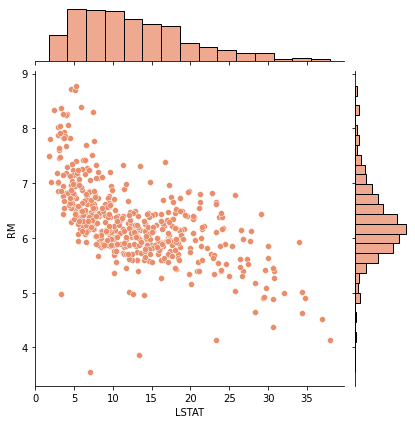

In [ ]:
sns.jointplot(data=data, x='LSTAT', y='RM')

The more the % of lower income population is, the less number of rooms is, as big number of rooms is usually more expensive.

###% of Lower Income Population VS Home Price

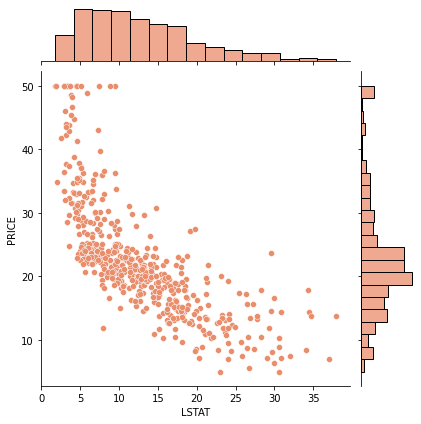

In [ ]:
sns.jointplot(data=data, x='LSTAT', y='PRICE')

The relationship is inversely proportional, which is understandable from its nature.

###Number of Rooms VS Home Value

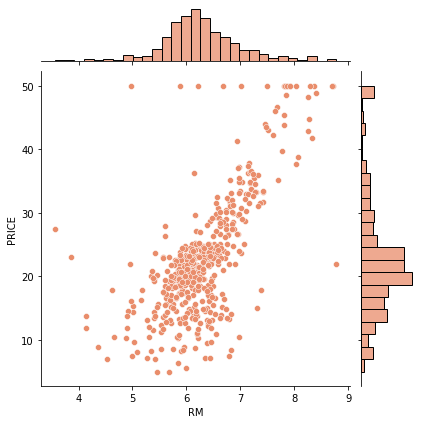

In [ ]:
sns.jointplot(data=data, x='RM', y='PRICE')

This plot relates to the 2 plots above and they are mutually explainable.

# Split Training & Test Dataset

Now it's time to start with modeling a linear regression, which will help in training model for predictions.

The train dataset will constitute 80% of the given dataset, and test dataset – 20%, as such proportion usually shows the best results.

The `random_state` is set to 10 to get the same results every time.

In [ ]:
target = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

The Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

#Multivariable Regression

###Running Regression

In [ ]:
rsquared = regr.score(X_train, y_train)
print(f"How well our model predicts the outcome: {rsquared:.3}%")

How well our model predicts the outcome: 0.75%


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).

In [ ]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficients'])
regr_coef

,Coefficients
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


Table above shows that all our visual conclusions are correct. 

The following coefficients increase the house price: ZN, CHAS, RM, AGE, RAD, B; and the following decrease the price: CRIM, INDUS, NOX, DIS, TAX, PTRATION, LSTAT. It is understandable from the coefficients' signs.

In [ ]:
extra_room = regr_coef.loc['RM'].values[0] * 1000  # i.e., ~3.11 * 1000
print(f'For example, the buyer should pay  ${extra_room:.5} for having one extra room.')

For example, the buyer should pay  $3108.5 for having one extra room.


In [ ]:
"nitric oxides concentration (parts per 10 million)"
more_oxides = regr_coef.loc['NOX'].values[0] * 1000
print(f"The buyer will save ${(more_oxides*-1):.6} for house placed in the area with one more part of nitric oxides per 10 million.")

The buyer will save $16272.0 for house placed in the area with one more part of nitric oxides per 10 million.


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```

In [ ]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

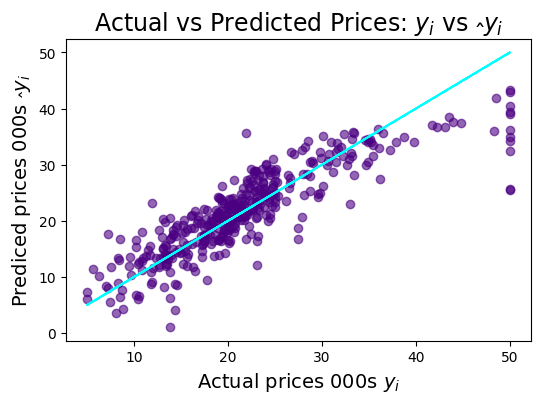

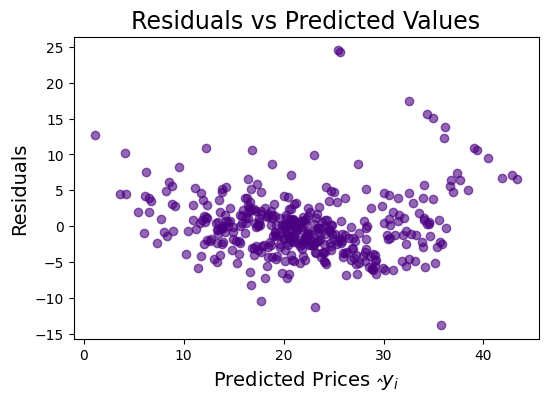

In [ ]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

The residuals chould look random, as they represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

Another good decision is to analyse the distribution of the residuals, it should be close to the normal distribution, in which the residuals skewness is close to 0.

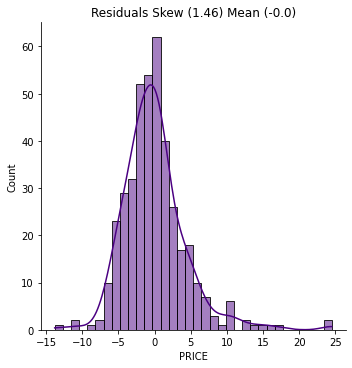

In [ ]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In our model the residuals skewness is 1.46, which is very high value, so our model need improvement.

##Data Transformation for a Better Fit

For our dataset I've chosen a log transformation for a PRICE column.

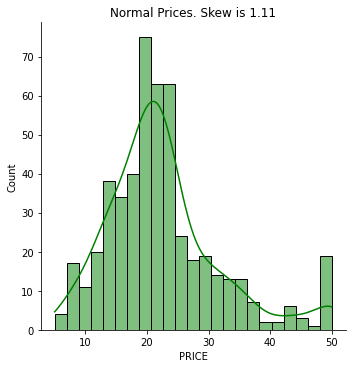

In [ ]:
tgt_skew = data['PRICE'].skew()
sns.displot(data['PRICE'], kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

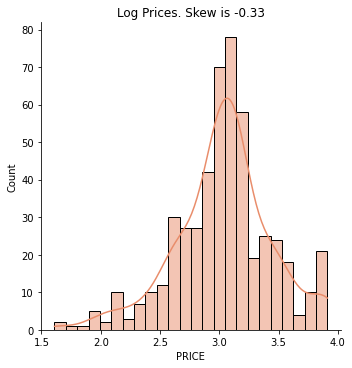

In [ ]:
y_log = np.log(data['PRICE'])
sns.displot(y_log, kde=True)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

The log prices have a skew that's closer to zero. This makes them a good candidate for use in our linear model. Perhaps using log prices will improve our regression's r-squared and our model's residuals. 

#Regression Using Log Prices

In [ ]:
new_target = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.79


The r-squared is higher than the r-squared of the given data, so the log values make our model fit better.

## Evaluating Coefficients with Log Prices

In [ ]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

,coef
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


Coefficients' signs are remained the same, so log prices are very good choice.

## Regression with Log Prices & Residual Plots


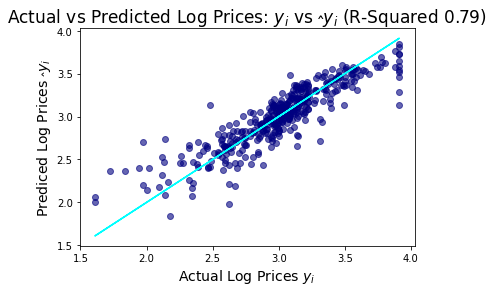

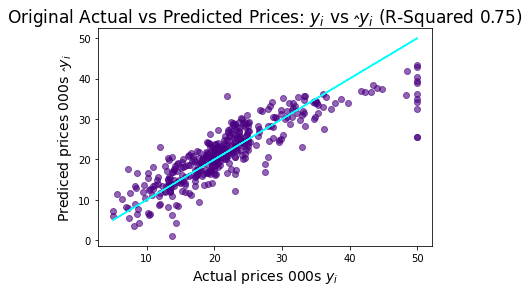

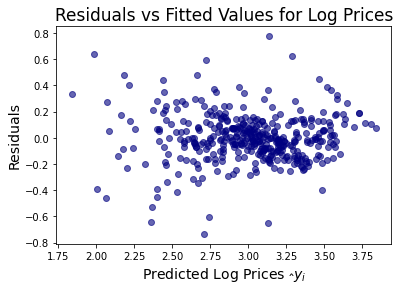

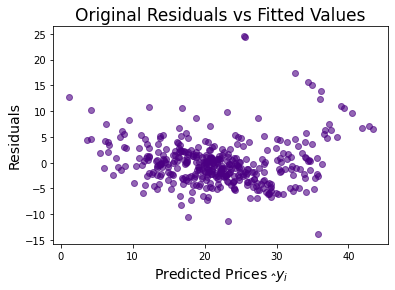

In [ ]:
# Graph of Actual vs. Predicted Log Prices
plt.scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted Prices
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log prices)
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


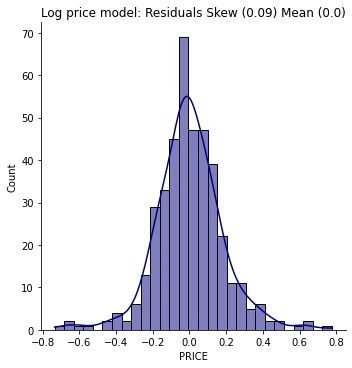

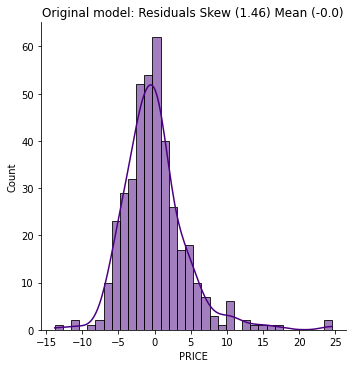

In [ ]:
# Distribution of Residuals (log prices) - checking for normality
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

The skewness of the log-price model is much more close to the 0, so log transformation has improved our model a lot.

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in. 

In [ ]:
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


By definition, the model has not been optimised for the testing data. Therefore performance will be worse than on the training data. However, our r-squared still remains high, so we have built a useful model.

# Predict a Property's Value using the Regression Coefficients

In [ ]:
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


In [ ]:
log_estimate = log_regr.predict(property_stats)[0]
print(f"The average property log price setimate is ${log_estimate:.3}")

The average property log price setimate is $3.03


In [ ]:
dollar_estimate = np.exp(log_estimate) * 1000
print(f"The average property dollar estimate is ${dollar_estimate:.6}")

The average property dollar estimate is $20703.2


###Predicting a house price with my own coefficients.

In [ ]:
# Defining Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [ ]:
if next_to_river:
  property_stats['CHAS'] = 1
else:
  property_stats['CHAS'] = 0

property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town
property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [ ]:
prediction = np.exp(log_regr.predict(property_stats)[0]) * 1000
print(f"Estimated price for entered property is ${prediction:.6}")

Estimated price for entered property is $25792.0


The built model works well and can be used for real predictions.